<a href="https://colab.research.google.com/github/vennasandeepreddy/Credit_card_fraud_detection/blob/main/CreditCard_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

import keras
import os
import matplotlib.pyplot as plt
import seaborn as sn
import itertools
from collections import Counter
np.random.seed(2)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Drive mounting
from google.colab import drive
drive.mount('/content/drive')

DIR_DATASET = '/content/drive/My Drive/SYSC5108 Project/Data/creditcard.csv'

df = pd.read_csv(DIR_DATASET)

Mounted at /content/drive


##**Exploratory Data Analysis**



In [ ]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Checking for missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

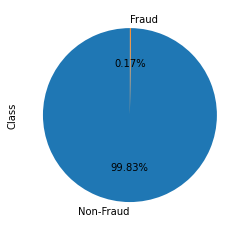

In [ ]:
labels = 'Non-Fraud', 'Fraud'
df["Class"].value_counts().plot.pie(autopct = "%1.2f%%", labels=labels, startangle=90)

### **PCA**

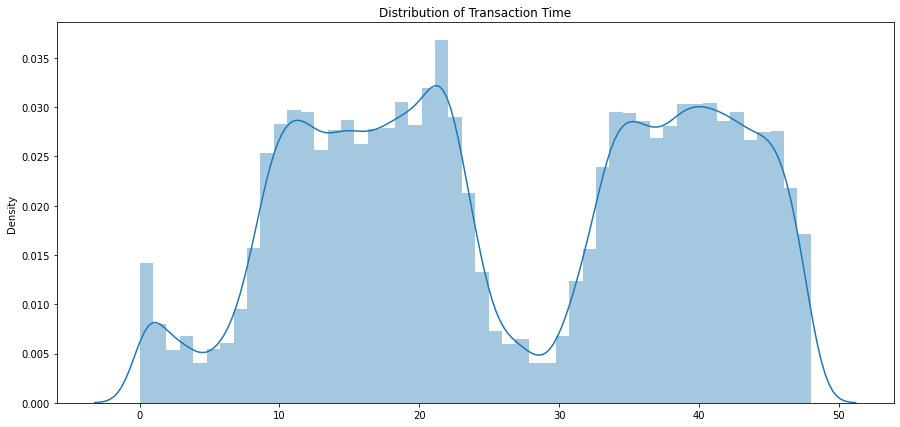

In [ ]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Time'].values/(60*60))

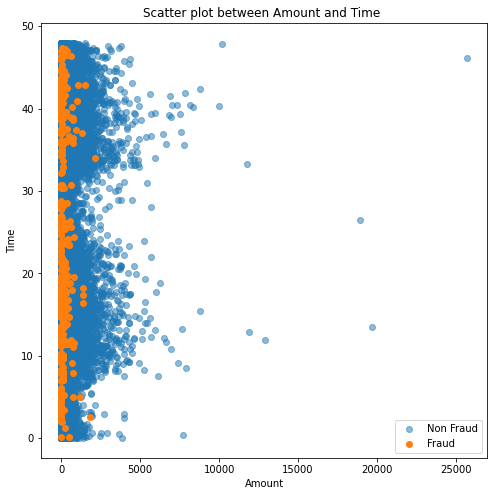

In [ ]:
# Storing both of them seperately
train_non_fraud = df[df.Class==0]
train_fraud = df[df.Class==1]

# Scatter plot between Amount and Time
fig = plt.figure(figsize = (8,8))
plt.scatter(train_non_fraud.Amount, train_non_fraud.Time.values/(60*60),alpha=0.5,label='Non Fraud')
plt.scatter(train_fraud.Amount, train_fraud.Time.values/(60*60),alpha=1,label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.title('Scatter plot between Amount and Time ')
plt.legend()
plt.show()

#### **Plotting the distributions of all the features**

<Figure size 432x288 with 0 Axes>

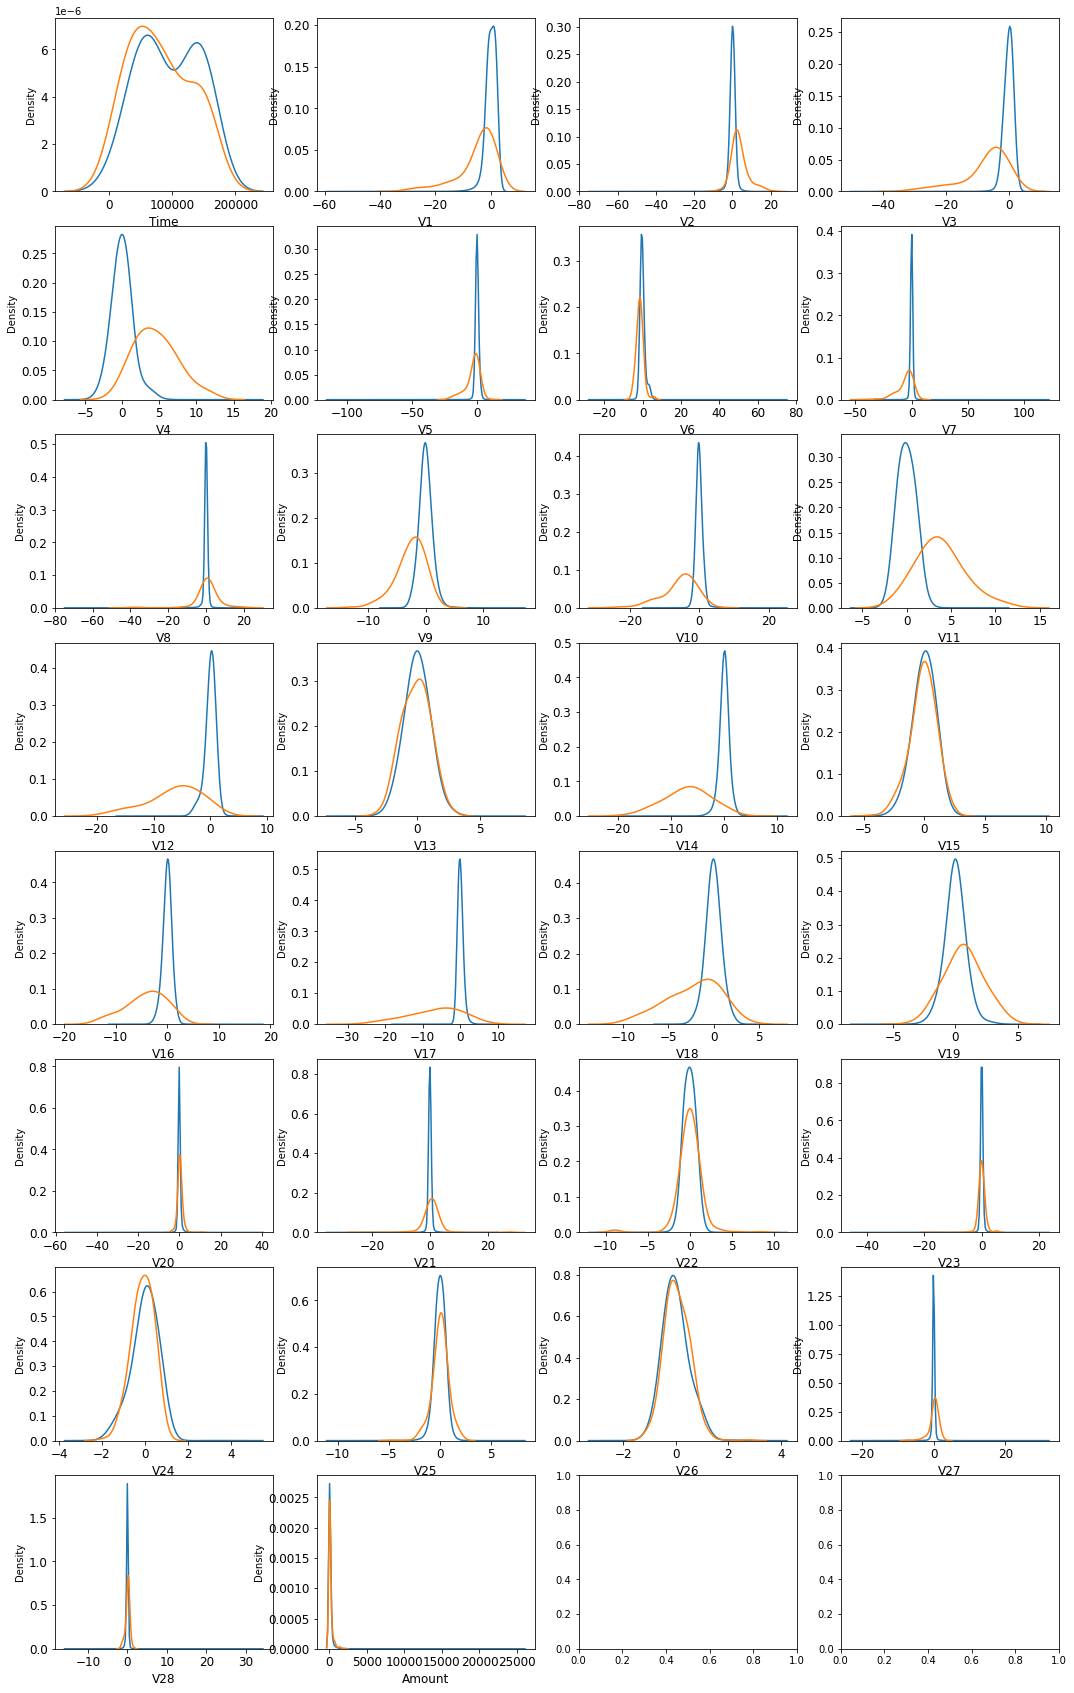

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(18,30))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

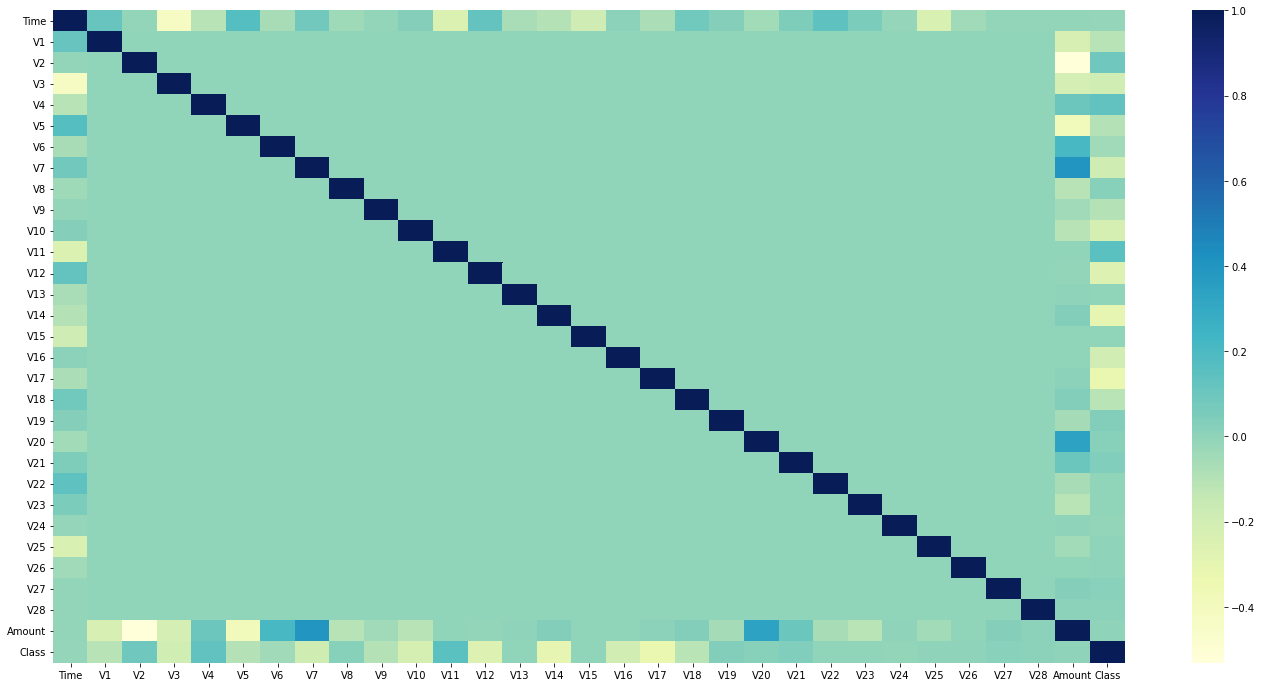

In [ ]:
# Heatmap for visualizing correlation

plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

##**Data preprocessing**



**Checking the skewness**

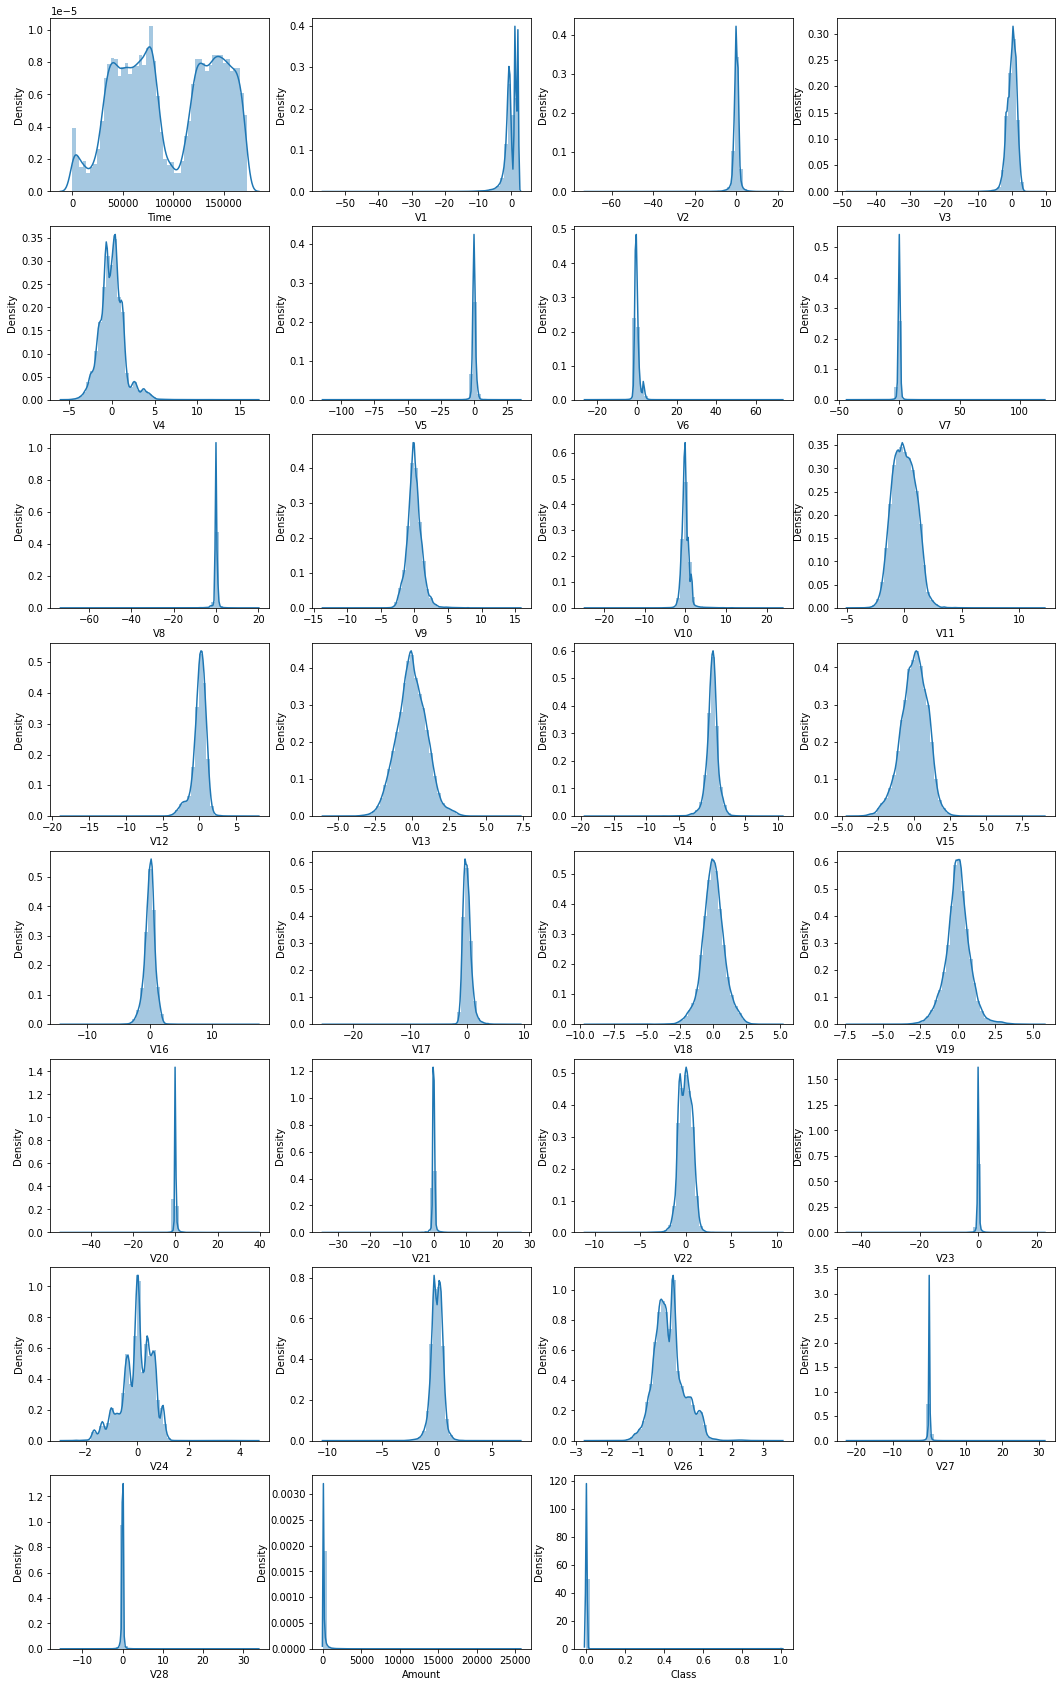

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
var = df.columns

plt.figure(figsize=(18,30))
i=0
for col in var:
    i += 1
    plt.subplot(8,4, i)
    sns.distplot(df[col])

plt.show()

In [ ]:
# Lets check the skewness of the features
var = df.columns
skew_list = []
for i in var:
    skew_list.append(df[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Skewness,-0.035568,-3.280667,-4.624866,-2.240155,0.676292,-2.425901,1.826581,2.553907,-8.521944,0.55468,1.187141,0.356506,-2.278401,0.065233,-1.995176,-0.308423,-1.100966,-3.844914,-0.25988,0.109192,-2.037155,3.592991,-0.213258,-5.87514,-0.552499,-0.415793,0.576693,-1.170209,11.192091,16.977724,23.997579


In [ ]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object', name='Features')


There is skewness present in the distribution of the above features:
Power Transformer package present in the preprocessing library provided by sklearn is used to make the distribution more gaussian

In [ ]:
from sklearn.preprocessing import PowerTransformer

# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
df[skewed] = pt.fit_transform(df[skewed])

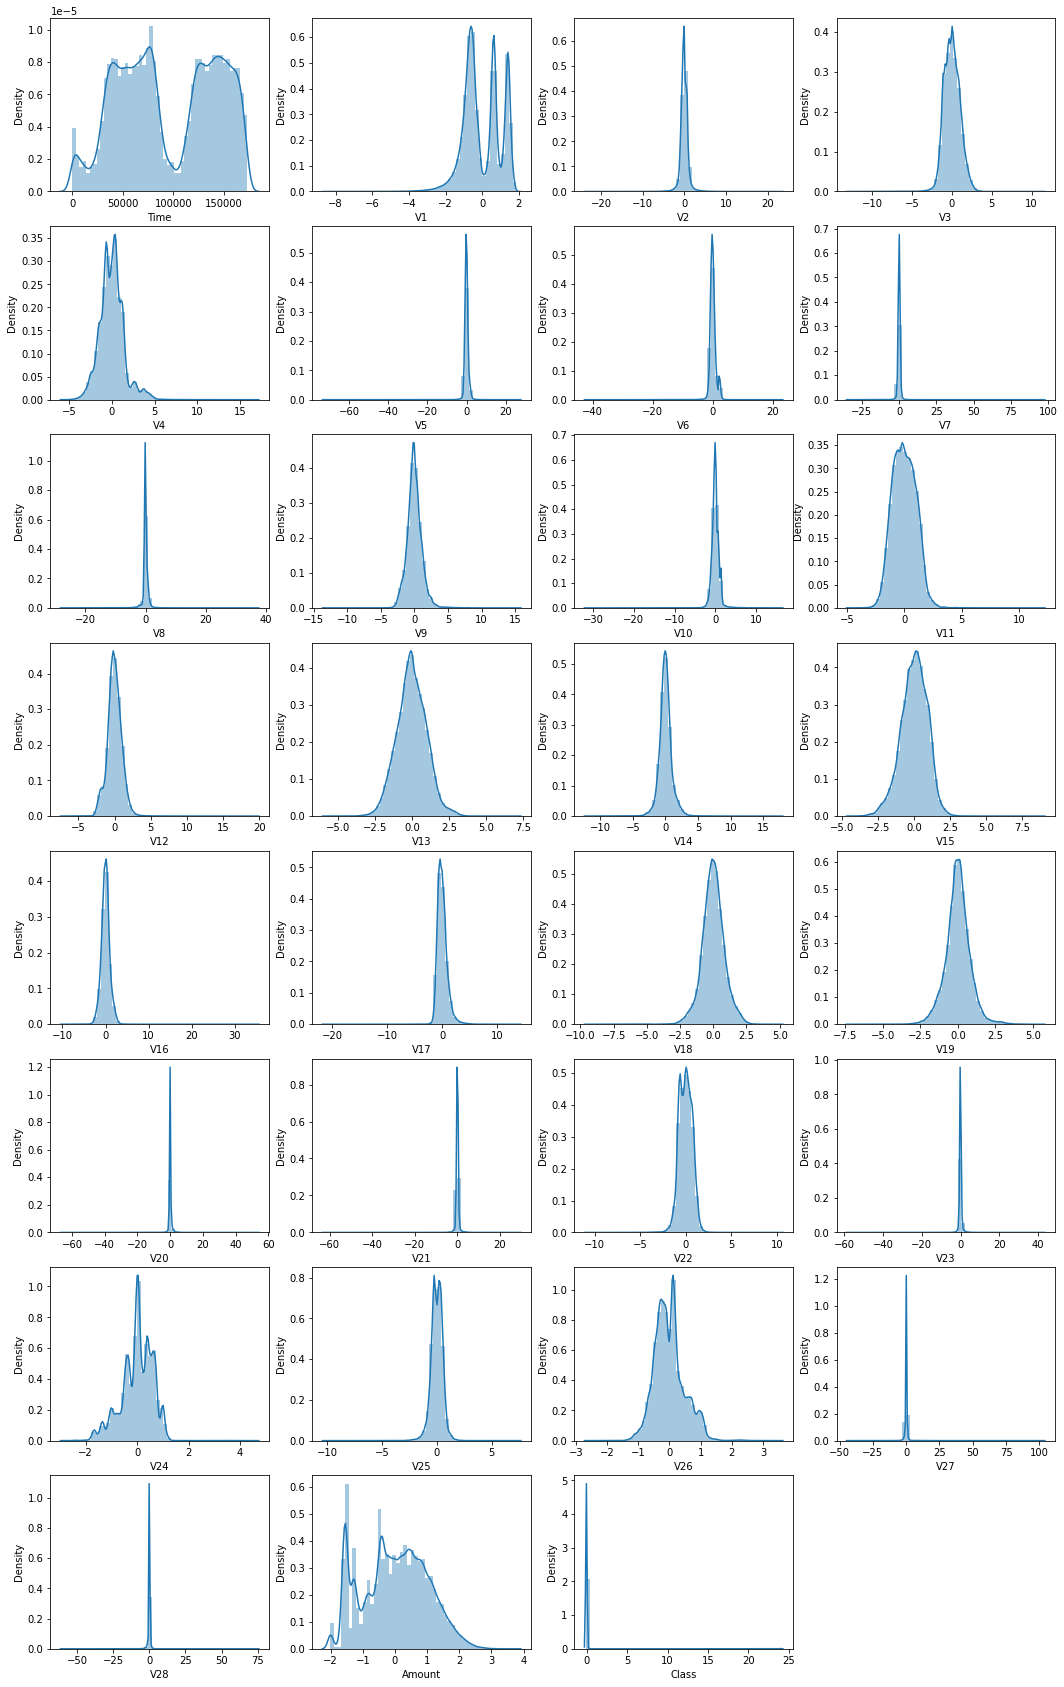

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
var = df.columns

plt.figure(figsize=(18,30))
i=0
for col in var:
    i += 1
    plt.subplot(8,4,i)
    sns.distplot(df[col])

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)

In [ ]:
type(scaled)

numpy.ndarray

In [ ]:
scaled_df = pd.DataFrame(scaled, columns = df.columns)
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.904815,-0.131503,2.176074,0.973366,-0.256110,0.459227,0.193516,0.020305,0.331128,0.127074,-0.540407,-0.774671,-0.996099,-0.404755,1.604014,-0.600774,0.215544,0.030770,0.496282,0.323559,-0.007670,0.382854,-0.189647,0.110507,0.246585,-0.392170,0.323027,-0.053332,1.119013,-0.041599
1,-1.996583,0.626390,0.093067,-0.035062,0.316523,0.031947,0.045846,-0.063874,0.006711,-0.232494,-0.115195,1.580003,1.296242,0.491418,-0.232720,0.694360,0.491958,-0.175639,-0.218763,-0.179086,-0.093203,-0.298760,-0.880077,0.153342,-0.561131,0.320694,0.261069,-0.035793,0.057491,-1.128464,-0.041599
2,-1.996562,-0.904242,-0.871858,1.381297,0.268231,-0.374492,1.320901,0.639714,0.172348,-1.378675,0.234324,0.611830,-0.104954,0.720700,-0.255865,2.562906,-2.809663,1.383126,-0.144790,-2.778561,0.680896,0.357879,1.063358,1.501808,-1.138092,-0.628537,-0.288447,-0.151417,-0.173752,1.623286,-0.041599
3,-1.996562,-0.742857,-0.202760,1.401049,-0.609727,-0.019151,0.983351,0.191907,0.309141,-1.262503,-0.008922,-0.221892,0.026987,0.510169,-0.381222,-0.689837,-1.194700,-0.829186,2.345305,-1.514205,-0.273184,-0.133275,0.007267,-0.317680,-1.941027,1.241904,-0.460217,0.144087,0.201524,1.012504,-0.041599
4,-1.996541,-0.823641,0.530197,1.160592,0.284655,-0.305614,0.187360,0.479194,-0.331706,0.744326,0.718432,-0.806147,0.496185,1.352244,-1.168769,0.191323,-0.580731,-0.319406,-0.045569,0.987037,0.528646,0.004660,1.100011,-0.232990,0.233250,-0.395202,1.041611,0.541488,0.669838,0.692981,-0.041599


In [ ]:
df_class_list = df['Class'].values

In [ ]:
df['Class'] = np.where(df_class_list < 0,0,1)

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
scaled_df = scaled_df.drop(['Time'], axis = 1)

In [ ]:
y = df['Class']
X = scaled_df.drop(['Class'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Create deep learning model
model = Sequential()
#add input layer
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 55s 4ms/step - loss: 0.0102 - accuracy: 0.9981
Epoch 2/5
13291/13291 [==============================] - 53s 4ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 52s 4ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 52s 4ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 52s 4ms/step - loss: 0.0039 - accuracy: 0.9994


In [ ]:
#Evaluate model
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 8s 3ms/step - loss: 0.0036 - accuracy: 0.9994
[0.0035650283098220825, 0.9993796944618225]


In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85277    19]
 [   34   113]]


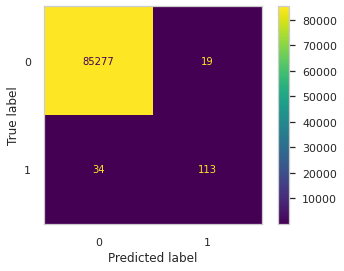

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred.round())
plt.grid(False)
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9993797034280163
0.8560606060606061
0.7687074829931972
0.8100358422939067


### Handling the imbalance in the dataset using SMOTE

In [ ]:
X_resample, y_resample = SMOTE().fit_resample(X, y)
counter = Counter(y_resample)
print(counter)

Counter({0: 284315, 1: 284315})


In [ ]:
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resample, y_resample, test_size = 0.3)
X_train_resample = np.array(X_train_resample)
X_test_resample = np.array(X_test_resample)
y_train_resample = np.array(y_train_resample)
y_test_resample = np.array(y_test_resample)

In [ ]:
METRICS = [
    #keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)
history = model.fit(X_train_resample, y_train_resample, batch_size = 15, epochs = 5, validation_split=0.2)

Epoch 1/5
21229/21229 [==============================] - 224s 10ms/step - loss: 0.0513 - fn: 2423.0000 - fp: 3446.0000 - tn: 155826.0000 - tp: 156737.0000 - precision: 0.9785 - recall: 0.9848 - val_loss: 0.0202 - val_fn: 119.0000 - val_fp: 317.0000 - val_tn: 39632.0000 - val_tp: 39541.0000 - val_precision: 0.9920 - val_recall: 0.9970
Epoch 2/5
21229/21229 [==============================] - 169s 8ms/step - loss: 0.0191 - fn: 395.0000 - fp: 1328.0000 - tn: 157944.0000 - tp: 158765.0000 - precision: 0.9917 - recall: 0.9975 - val_loss: 0.0145 - val_fn: 140.0000 - val_fp: 186.0000 - val_tn: 39763.0000 - val_tp: 39520.0000 - val_precision: 0.9953 - val_recall: 0.9965
Epoch 3/5
21229/21229 [==============================] - 173s 8ms/step - loss: 0.0151 - fn: 292.0000 - fp: 978.0000 - tn: 158294.0000 - tp: 158868.0000 - precision: 0.9939 - recall: 0.9982 - val_loss: 0.0116 - val_fn: 12.0000 - val_fp: 227.0000 - val_tn: 39722.0000 - val_tp: 39648.0000 - val_precision: 0.9943 - val_recall: 0.999

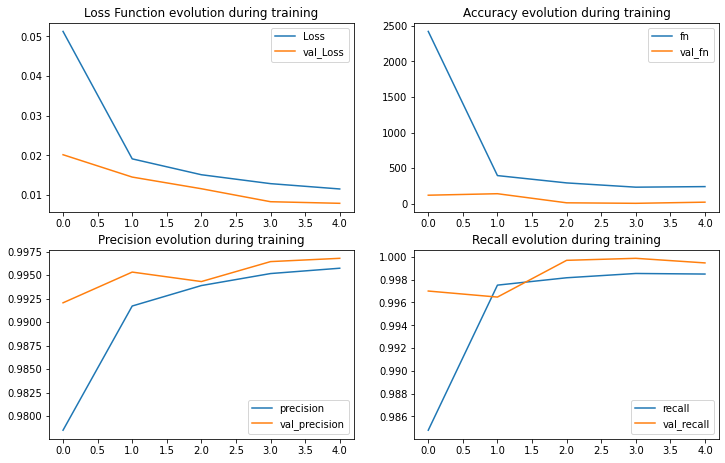

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function evolution during training')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['fn'], label='fn')
plt.plot(history.history['val_fn'], label='val_fn')
plt.title('Accuracy evolution during training')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision evolution during training')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall evolution during training')
plt.legend()

In [ ]:
y_pred = model.predict(X_test_resample)
y_expect = pd.DataFrame(y_test_resample)
cm = confusion_matrix(y_expect, y_pred.round())
print(cm)

[[84790   304]
 [   45 85450]]


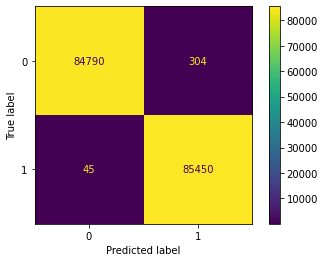

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_resample, y_pred.round())
plt.grid(False)
plt.show()

In [ ]:
print(accuracy_score(y_test_resample, y_pred.round()))
print(precision_score(y_test_resample, y_pred.round()))
print(recall_score(y_test_resample, y_pred.round()))
print(f1_score(y_test_resample, y_pred.round()))

0.9979541471020992
0.9964549758611844
0.9994736534300251
0.9979620318950767


In [ ]:
!pip install opentsne

     |████████████████████████████████| 2.5 MB 11.8 MB/s 


--------------------------------------------------------------------------------
TSNE(n_iter=100, perplexity=50, verbose=1)
--------------------------------------------------------------------------------
===> Finding 150 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 172.37 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 29.56 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.58 seconds
===> Running optimization with exaggeration=12.00, lr=23733.92 for 250 iterations...
Iteration   50, KL divergence 7.4185, 50 iterations in 23.6735 sec
Iteration  100, KL divergence 6.6250, 50 iterations in 22.4400 sec
Iteration  150, KL divergence 5.8402, 50 iterations in 22.4875 sec
Iteration  200, KL divergence 5.4642, 50 iterations in 22.3554 sec
Iteration  250, KL divergence 5.2144, 50 iterations in 29.0971 sec
   --> Time elapsed: 120.06 seconds
===> Running optimization with exaggeration=1.00, lr=23733.

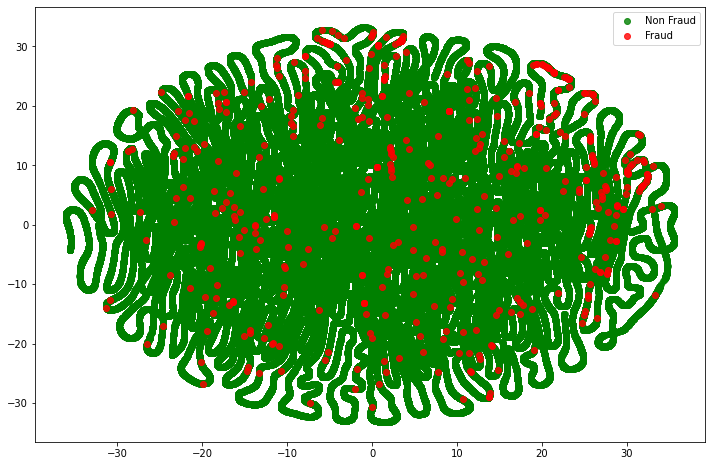

In [ ]:
from openTSNE import TSNE

non_fraud = df[df['Class'] == 0].sample(1000)
fraud = df[df['Class'] == 1]

df_tsne = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X_tsne = df.drop(['Class'], axis = 1).values
Y_tsne = df["Class"].values

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=100)
X_t = tsne.fit(X_tsne)

plt.figure(figsize=(12, 8))
plt.scatter(X_t[np.where(Y_tsne == 0), 0], X_t[np.where(Y_tsne == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
plt.scatter(X_t[np.where(Y_tsne == 1), 0], X_t[np.where(Y_tsne == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

plt.legend(loc='best');
plt.show();

--------------------------------------------------------------------------------
TSNE(verbose=1)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 124.29 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 16.86 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.49 seconds
===> Running optimization with exaggeration=12.00, lr=23733.92 for 250 iterations...
Iteration   50, KL divergence 7.9867, 50 iterations in 15.4555 sec
Iteration  100, KL divergence 7.1525, 50 iterations in 17.6577 sec
Iteration  150, KL divergence 6.3663, 50 iterations in 15.5445 sec
Iteration  200, KL divergence 5.9861, 50 iterations in 15.6903 sec
Iteration  250, KL divergence 5.7317, 50 iterations in 15.5426 sec
   --> Time elapsed: 79.89 seconds
===> Running optimization with exaggeration=1.00, lr=23733.92 for 500 iterations...
Iter

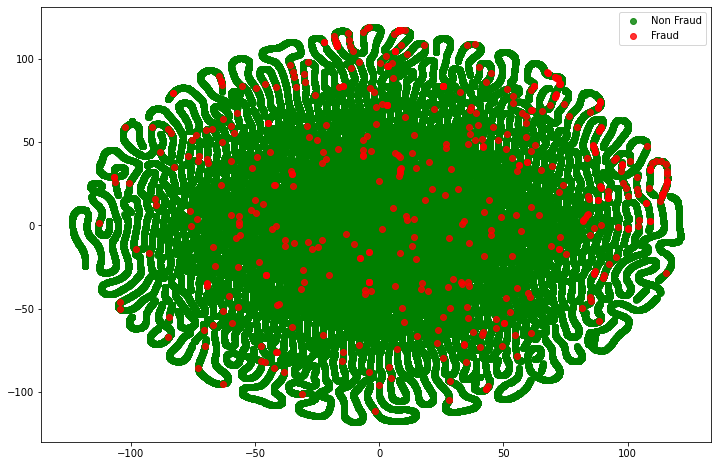

In [ ]:
non_fraud = df[df['Class'] == 0].sample(1000)
fraud = df[df['Class'] == 1]

df_tsne = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X_tsne = df.drop(['Class'], axis = 1).values
Y_tsne = df["Class"].values

tsne = TSNE(n_components=2, verbose=1)
X_t = tsne.fit(X_tsne)

plt.figure(figsize=(12, 8))
plt.scatter(X_t[np.where(Y_tsne == 0), 0], X_t[np.where(Y_tsne == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
plt.scatter(X_t[np.where(Y_tsne == 1), 0], X_t[np.where(Y_tsne == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

plt.legend(loc='best');
plt.show();

## AutoEncoders to the rescue

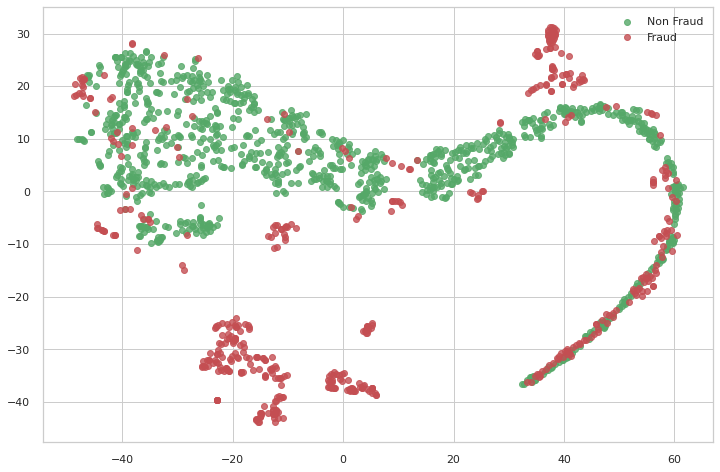

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

data = pd.read_csv("creditcard.csv")
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24)
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

In [ ]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [ ]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [ ]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [ ]:
autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

Epoch 1/10
7/7 [==============================] - 2s 67ms/step - loss: 0.2466 - val_loss: 0.2449
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2462 - val_loss: 0.2445
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2458 - val_loss: 0.2441
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2454 - val_loss: 0.2437
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2450 - val_loss: 0.2432
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2445 - val_loss: 0.2428
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2441 - val_loss: 0.2423
Epoch 8/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2437 - val_loss: 0.2419
Epoch 9/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2432 - val_loss: 0.2414
Epoch 10/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2427 - val_loss: 0.2409


In [ ]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [ ]:
norm_hid_rep = hidden_representation.predict(x_norm[:3000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

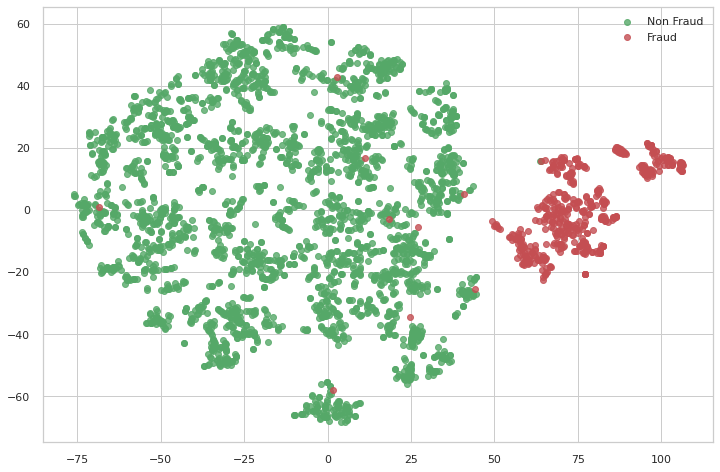

In [ ]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       742
         1.0       1.00      0.92      0.96       131

    accuracy                           0.99       873
   macro avg       0.99      0.96      0.97       873
weighted avg       0.99      0.99      0.99       873


Accuracy Score:  0.9873997709049256


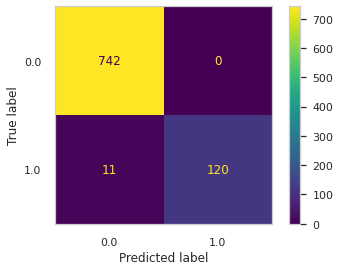

In [ ]:
ConfusionMatrixDisplay.from_predictions(val_y, pred_y.round())
plt.grid(False)
plt.show()

In [ ]:
print(accuracy_score(val_y, pred_y.round()))
print(precision_score(val_y, pred_y.round()))
print(recall_score(val_y, pred_y.round()))
print(f1_score(val_y, pred_y.round()))

0.9873997709049256
1.0
0.916030534351145
0.9561752988047809


## Exploring the model's architecture with AutoML

In [ ]:
# Specific imports for AutoML
!pip install autokeras
import autokeras as ak

     |████████████████████████████████| 160 kB 11.4 MB/s 
     |████████████████████████████████| 133 kB 27.9 MB/s 
     |████████████████████████████████| 462 kB 26.0 MB/s 


In [ ]:
# Preparing the model

METRICS = [
    keras.metrics.Accuracy(name='val_accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

automl_clf = ak.StructuredDataClassifier(max_trials=5, overwrite=True, loss='binary_crossentropy', metrics=METRICS)

# Fitting the model on the data not resampled
history = automl_clf.fit(X_train, y_train, epochs=5)

Trial 5 Complete [00h 04m 39s]
val_accuracy: 1.253761274710996e-05

Best val_accuracy So Far: 5.015045098843984e-05
Total elapsed time: 00h 27m 35s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
6231/6231 [==============================] - 49s 8ms/step - loss: 0.0082 - val_accuracy: 3.7624e-05 - fn: 121.0000 - fp: 157.0000 - tn: 238627.0000 - tp: 303.0000 - precision: 0.6587 - recall: 0.7146
Epoch 2/5
6231/6231 [==============================] - 47s 8ms/step - loss: 0.0031 - val_accuracy: 5.0160e-06 - fn: 73.0000 - fp: 43.0000 - tn: 198976.0000 - tp: 272.0000 - precision: 0.8635 - recall: 0.7884
Epoch 3/5
6231/6231 [==============================] - 48s 8ms/step - loss: 0.0027 - val_accuracy: 1.0032e-05 - fn: 72.0000 - fp: 37.0000 - tn: 198982.0000 - tp: 273.0000 - precision: 0.8806 - recall: 0.7913
Epoch 4/5
6231/6231 [==============================] - 48s 8ms/step - loss: 0.0025 - val_accuracy: 4.5144e-05 - fn: 73.0000 - fp: 34.0000 - tn: 198985.0000 - tp: 272.0000 - precision: 0.88

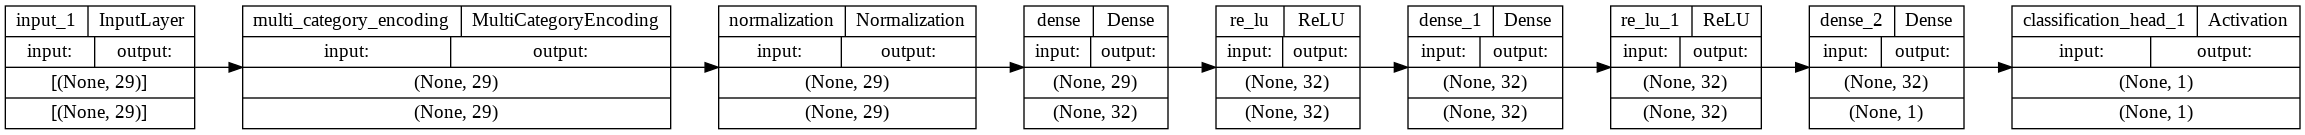

In [ ]:
# Show model's architecture
model = automl_clf.export_model()
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
# Evaluate the model
score = automl_clf.evaluate(X_test, y_test)

print(score)

2671/2671 [==============================] - 34s 12ms/step - loss: 0.0032 - val_accuracy: 1.0533e-04 - fn: 35.0000 - fp: 12.0000 - tn: 85284.0000 - tp: 112.0000 - precision: 0.9032 - recall: 0.7619
[0.003182497341185808, 0.00010533338354434818, 35.0, 12.0, 85284.0, 112.0, 0.9032257795333862, 0.761904776096344]


2671/2671 [==============================] - 8s 3ms/step
[[85284    12]
 [   35   112]]


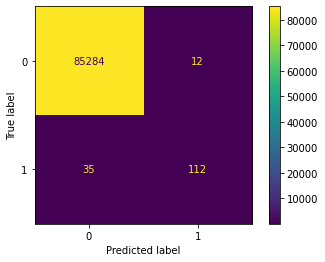

0.9994499256814484
0.9032258064516129
0.7619047619047619
0.8265682656826567


In [ ]:
y_pred = automl_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred.round())
plt.grid(False)
plt.show()

print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

#### AutoML on balanced data

In [ ]:
automl_clf = ak.StructuredDataClassifier(max_trials=5, overwrite=True, loss='binary_crossentropy', metrics=METRICS)

# Fitting the model on the data resampled
history = automl_clf.fit(X_train_resample, y_train_resample, epochs=5)

Trial 5 Complete [00h 10m 15s]
val_accuracy: 0.3711659610271454

Best val_accuracy So Far: 0.3711659610271454
Total elapsed time: 00h 52m 44s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
12439/12439 [==============================] - 107s 8ms/step - loss: 0.0541 - val_accuracy: 0.2857 - fn: 3500.0000 - fp: 3513.0000 - tn: 235639.0000 - tp: 234966.0000 - precision: 0.9853 - recall: 0.9853
Epoch 2/5
12439/12439 [==============================] - 105s 8ms/step - loss: 0.0213 - val_accuracy: 0.3283 - fn: 695.0000 - fp: 1482.0000 - tn: 197739.0000 - tp: 198125.0000 - precision: 0.9926 - recall: 0.9965
Epoch 3/5
12439/12439 [==============================] - 105s 8ms/step - loss: 0.0171 - val_accuracy: 0.3358 - fn: 482.0000 - fp: 1080.0000 - tn: 198141.0000 - tp: 198338.0000 - precision: 0.9946 - recall: 0.9976
Epoch 4/5
12439/12439 [==============================] - 105s 8ms/step - loss: 0.0145 - val_accuracy: 0.3573 - fn: 365.0000 - fp: 929.0000 - tn: 198292.0000 - tp: 198455.0000 - pre

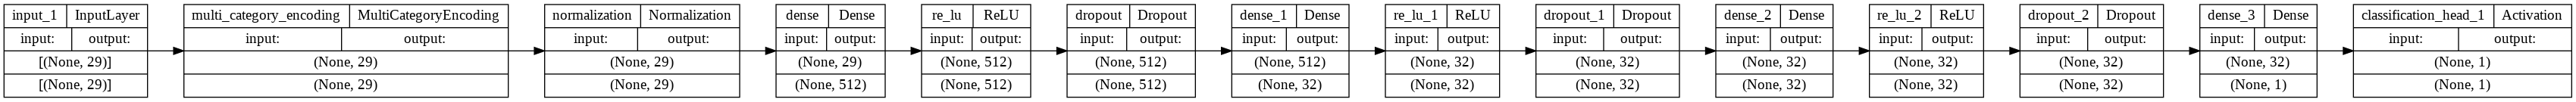

In [ ]:
# Show model's architecture
model = automl_clf.export_model()
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
# Evaluate the model
score = automl_clf.evaluate(X_test_resample, y_test_resample)

print(score)

5331/5331 [==============================] - 39s 7ms/step - loss: 0.0046 - val_accuracy: 0.3982 - fn: 0.0000e+00 - fp: 160.0000 - tn: 84934.0000 - tp: 85495.0000 - precision: 0.9981 - recall: 1.0000
[0.004569502547383308, 0.3982495963573456, 0.0, 160.0, 84934.0, 85495.0, 0.998132050037384, 1.0]


5331/5331 [==============================] - 16s 3ms/step
[[84934   160]
 [    0 85495]]


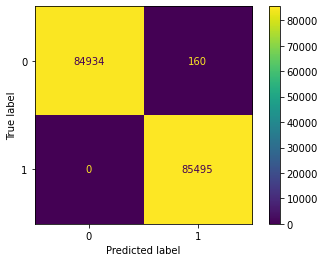

0.9990620731700168
0.9981320413285856
1.0
0.9990651475314052


In [ ]:
y_pred = automl_clf.predict(X_test_resample)
cm = confusion_matrix(y_test_resample, y_pred.round())
print(cm)

disp = ConfusionMatrixDisplay.from_predictions(y_test_resample, y_pred.round())
plt.grid(False)
plt.show()

print(accuracy_score(y_test_resample, y_pred.round()))
print(precision_score(y_test_resample, y_pred.round()))
print(recall_score(y_test_resample, y_pred.round()))
print(f1_score(y_test_resample, y_pred.round()))